In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

## Code and Dataset from the Lasso Lesson

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

## Lasso Drill Instructions

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity. If $\lambda$ is too large, all parameters will be set to zero.
Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.
Do lasso and ridge yield the same $R^2$ for a given lambda value?
Submit your work and discuss the results with your mentor.

Here are 10 different $\lambda$ values that I will be testing on my dataset to compare the resulting $R^2$ values

In [3]:
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

In [4]:
# Entering my data into a dataframe so that it can easily be plotted.
pretty_data = pd.DataFrame(
    alpha_ridge,
    columns=['lambda']
    )

In [5]:
# Lists for the R2 values of each model
Lasso_list = []
Ridge_list = []

# Iterate through each lambda value
for i in alpha_ridge: 
    # Lasso model fitted to the X_train2 dataset with each new lambda 
    lass = linear_model.Lasso(alpha=i)
    Lassfit = lass.fit(X_train2, Y_train)
    # Appending the R2 value from each iteration to an outside list
    Lasso_list.append(Lassfit.score(X_train2, Y_train)) 
    # Printing out the coefficents of each iteration.
    LassCoeff = np.append(Lassfit.coef_, Lassfit.intercept_)
    print('\nCoefficents and Intercept for the Lasso model:')
    print(LassCoeff)
    
    # Ridge model fitted to the X_train2 dataset with each new lambda 
    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    Ridgefit = ridge.fit(X_train2, Y_train)
    # Appending the R2 value from each iteration to an outside list
    Ridge_list.append(Ridgefit.score(X_train2, Y_train))
    # Printing out the coefficents of each iteration.
    RidgeCoeff = np.append(Ridgefit.coef_, Ridgefit.intercept_)
    print('\nCoefficents and Intercept for the Ridge model:')
    print(RidgeCoeff)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Coefficents and Intercept for the Lasso model:
[ -2.06111494e-03  -7.58818422e-01   6.04810006e-02  -3.53546655e-03
   9.26788633e-03  -3.79292001e-03   1.76197742e-01  -2.05761745e-04
  -9.11532536e-07   1.20391468e+00]

Coefficents and Intercept for the Ridge model:
[ -4.29254838e-03  -7.58973840e-01   1.08504087e+01  -1.66243718e-03
   1.18253819e-02  -4.44876140e-03   1.12523597e+02  -1.72799814e-01
   6.02763010e-04   0.00000000e+00]

Coefficents and Intercept for the Lasso model:
[ -2.06111099e-03  -7.58818421e-01   6.04808898e-02  -3.53546822e-03
   9.26788283e-03  -3.79291929e-03   1.76186736e-01  -2.05758463e-04
  -9.11532391e-07   1.20399178e+00]

Coefficents and Intercept for the Ridge model:
[ -4.29321709e-03  -7.58973830e-01   1.08447813e+01  -1.66238061e-03
   1.18258724e-02  -4.44876527e-03   1.12463637e+02  -1.72706198e-01
   6.02426447e-04   0.00000000e+00]

Coefficents and Intercept for the Lasso model:
[ -2.06071105e-03  -7.58818399e-01   6.04700130e-02  -3.53563972

In [6]:
# Creating new columns in the dataframe with the R2 values for the Lasso and Ridge models
pretty_data['Lasso R2'] = Lasso_list
pretty_data['Ridge R2'] = Ridge_list

In [7]:
pretty_data

,lambda,Lasso R2,Ridge R2
0,1.000000e-15,0.573944,0.573973
1,1.000000e-10,0.573944,0.573973
2,1.000000e-08,0.573944,0.573973
3,1.000000e-04,0.573940,0.573972
4,1.000000e-03,0.573937,0.573972
5,1.000000e-02,0.573768,0.573972
6,1.000000e+00,0.026834,0.573969
7,5.000000e+00,0.026834,0.573955
8,1.000000e+01,0.026834,0.573946
9,2.000000e+01,0.026834,0.573934


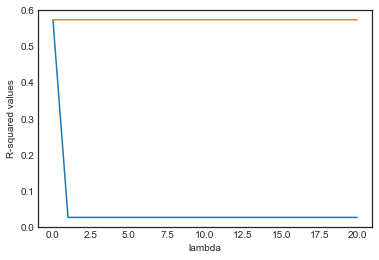

In [8]:
# Plot a line for each model's R2 values.
for var in ['Lasso R2', 'Ridge R2']:
    plt.plot(pretty_data['lambda'], pretty_data[var])
plt.xlabel('lambda')
plt.ylabel('R-squared values')
plt.show()